<a href="https://colab.research.google.com/github/hhw330pixel/DataAnalysis/blob/main/openSourceDataAnalysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Open API 기본 연결

In [ ]:
import requests

# 인증키
API_KEY = "486e4d527a68687731387258775259"

url = f"http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/5/2015/01"

# API 요청 보내기
response = requests.get(url)

# 서버 응답 상태 확인
print("상태 코드 : ", response.status_code)

# 데이터 내용 확인 ( 앞 부분만 보기 )
print(response.text[:300])

상태 코드 :  200
{"energyUseDataSummaryInfo":{"list_total_count":7,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"YEAR":"2015","MON":"01","MM_TYPE":"개인","CNT":"767791","EUS":"193784708","EUS1":"194781915","EUS2":"204969429","ECO2_1":"-6090964","ECO2_2":"-2582568.736","GUS":"59133720","GUS1":"57163993",


JSON 데이터 변환

In [ ]:
import requests
import json # 데이터 정렬


# 인증키
API_KEY = "486e4d527a68687731387258775259"

url = f"http://openapi.seoul.go.kr:8088/{API_KEY}/json/energyUseDataSummaryInfo/1/5/2015/01"

# API 요청 보내기
response = requests.get(url)

data = response.json()
print(type(data))
print(data.keys())

rows = data['energyUseDataSummaryInfo']['row']
print("======================================")
print(rows)
print(f"반환값 개수 : {len(rows)}")

print("# JSON 정렬 =========================")
print(json.dumps(rows, indent=4, ensure_ascii=False))

# json.dumps() : 파이썬 데이터를 JSON 형식의 문자열로 바꿔줌
# indent=4 : 4칸 들여쓰기
# ensure_ascii=False : 한글 깨짐 방지

<class 'dict'>
dict_keys(['energyUseDataSummaryInfo'])
[{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2': '2133200.8', 'WCO2_1': '-39498.1', 'WCO2_2': '-13113.3692', 

API 호출 및 수집하기

In [ ]:
import requests
import json # 데이터 정렬
import pandas as pd


# 인증키
API_KEY = "486e4d527a68687731387258775259"
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo"

data_list = []
api_checked = False


for year in range(2015, 2025):      # 2015 ~ 2024
    for month in range(1, 13):      # 1월 ~ 12월
        ym = f"{year}/{month:02d}"  # 포맷(2자리이나, 한 자릿수의 경우 앞을 0으로 채움)
        url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/100/{year}/{month:02d}"

        response = requests.get(url)

        if not api_checked:
            print(f"API 호출 성공 : 상태코드 [{response.status_code}]")
            api_checked = True

        if response.status_code == 200:
            json_data = response.json()

            try:
                rows = json_data['energyUseDataSummaryInfo']['row']
                for r in rows:
                    if r['MM_TYPE'] == '개인':
                        data_list.append(r)
                        print(f"{ym} 수집 완료")
            except KeyError:
                print(f"{ym}수집 불가")
        else:
            print(f"{ym} 요청 실패 : 상태코드[{response.status_code}]")

# DataFrame으로 변환
df = pd.DataFrame(data_list)

# 수집된 데이터 출력
print(df.head().to_string(index=False)) # 인덱스 없이 출력



API 호출 성공 : 상태코드 [200]
2015/01 수집 완료
2015/02 수집 완료
2015/03 수집 완료
2015/04 수집 완료
2015/05 수집 완료
2015/06 수집 완료
2015/07 수집 완료
2015/08 수집 완료


KeyboardInterrupt: 

In [ ]:
import requests
import json # 데이터 정렬
import pandas as pd


# 인증키
API_KEY = "486e4d527a68687731387258775259"
BASE_URL = "http://openapi.seoul.go.kr:8088"
SERVICE = "energyUseDataSummaryInfo"

data_list = []
api_checked = False


for year in range(2015, 2025):      # 2015 ~ 2024
    for month in range(1, 13):      # 1월 ~ 12월
        ym = f"{year}/{month:02d}"  # 포맷(2자리이나, 한 자릿수의 경우 앞을 0으로 채움)
        url = f"{BASE_URL}/{API_KEY}/json/{SERVICE}/1/100/{year}/{month:02d}"

        response = requests.get(url)

        if not api_checked:
            print(f"API 호출 성공 : 상태코드 [{response.status_code}]")
            api_checked = True

        if response.status_code == 200:
            json_data = response.json()

            try:
                rows = json_data['energyUseDataSummaryInfo']['row']
                for r in rows:
                    if r['MM_TYPE'] == '개인':
                        data_list.append(r)
                        print(f"{ym} 수집 완료")
            except KeyError:
                print(f"{ym}수집 불가")
        else:
            print(f"{ym} 요청 실패 : 상태코드[{response.status_code}]")

# DataFrame으로 변환
df = pd.DataFrame(data_list)

# 수집된 데이터 출력
#print(df.head().to_string(index=False)) # 인덱스 없이 출력

# 수집된 데이터 CVS 저장
df.to_csv("eco_energy_data.csv", index=False, encoding="utf-8-sig")
print("\n▶ 에코마일리지 데이터 파일 저장 완료")
print(df.head().to_string(index=False))

API 호출 성공 : 상태코드 [200]
2015/01 수집 완료
2015/02 수집 완료
2015/03 수집 완료
2015/04 수집 완료
2015/05 수집 완료
2015/06 수집 완료
2015/07 수집 완료
2015/08 수집 완료
2015/09 수집 완료
2015/10 수집 완료
2015/11 수집 완료
2015/12 수집 완료
2016/01 수집 완료
2016/02 수집 완료
2016/03 수집 완료
2016/04 수집 완료
2016/05 수집 완료
2016/06 수집 완료
2016/07 수집 완료
2016/08 수집 완료
2016/09 수집 완료
2016/10 수집 완료
2016/11 수집 완료
2016/12 수집 완료
2017/01 수집 완료
2017/02 수집 완료
2017/03 수집 완료
2017/04 수집 완료
2017/05 수집 완료
2017/06 수집 완료
2017/07 수집 완료
2017/08 수집 완료
2017/09 수집 완료
2017/10 수집 완료
2017/11 수집 완료
2017/12 수집 완료
2018/01 수집 완료
2018/02 수집 완료
2018/03 수집 완료
2018/04 수집 완료
2018/05 수집 완료
2018/06 수집 완료
2018/07 수집 완료
2018/08 수집 완료
2018/09 수집 완료


KeyboardInterrupt: 

파일 불러와서 기본정보 출력

In [ ]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("eco_energy_data.csv", encoding="utf-8-sig")

print("▶ 데이터 기본정보 출력")
print(df.info())


▶ 데이터 기본정보 출력
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      120 non-null    int64  
 1   MON       120 non-null    int64  
 2   MM_TYPE   120 non-null    object 
 3   CNT       120 non-null    int64  
 4   EUS       120 non-null    int64  
 5   EUS1      120 non-null    int64  
 6   EUS2      120 non-null    int64  
 7   ECO2_1    120 non-null    float64
 8   ECO2_2    120 non-null    float64
 9   GUS       120 non-null    float64
 10  GUS1      120 non-null    float64
 11  GUS2      120 non-null    float64
 12  GCO2_1    120 non-null    float64
 13  GCO2_2    120 non-null    float64
 14  WUS       120 non-null    float64
 15  WUS1      120 non-null    float64
 16  WUS2      120 non-null    float64
 17  WCO2_1    120 non-null    float64
 18  WCO2_2    120 non-null    float64
 19  HUS       120 non-null    float64
 20  HUS1      120 non-

데이터 컬럼 추가 및 전처리

In [ ]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("eco_energy_data.csv", encoding="utf-8-sig")

# 년도, 월 숫자형으로 변환
df["YEAR"] = df["YEAR"].astype(int)
df["MON"] = df["MON"].astype(int)

df["year"] = df["YEAR"]

# 계절 구분 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가울"
    else:
        return "겨울"


df["season"] = df["MON"].apply(get_season)

print("\n[문제 2-2] 연도 및 계절 컬럼 추가 결과")
print("========================================")
print(df[["YEAR", "MON", "year", "season"]].head(10).to_string(index=False))


[문제 2-2] 연도 및 계절 컬럼 추가 결과
 YEAR  MON  year season
 2015    1  2015     겨울
 2015    2  2015     겨울
 2015    3  2015      봄
 2015    4  2015      봄
 2015    5  2015      봄
 2015    6  2015     여름
 2015    7  2015     여름
 2015    8  2015     여름
 2015    9  2015     가울
 2015   10  2015     가울


데이터 시각화

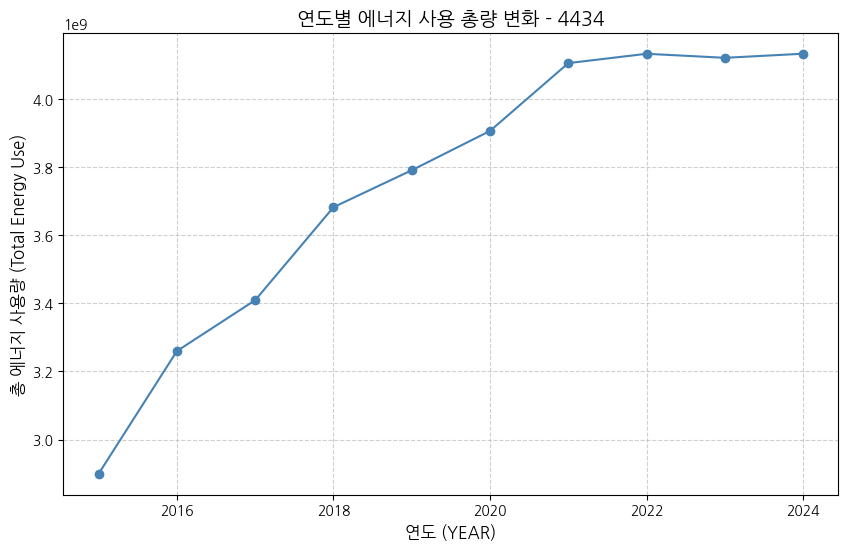

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 불러오기
df = pd.read_csv("eco_energy_data.csv", encoding="utf-8-sig")

# 총 에너지 사용량 컬럼 추가
df["TOT_USE"] = df["EUS"] + df["GUS"] + df["WUS"] + df["HUS"]

# 연도별 총 에너지 사용량 합계
year_sum = df.groupby("YEAR")["TOT_USE"].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(year_sum["YEAR"], year_sum["TOT_USE"], marker='o', linestyle='-', color='steelblue')

# 제목, 축 라벨 생성 (학번 뒤 4자리 4434)
plt.title("연도별 에너지 사용 총량 변화 - 4434", fontsize=14)
plt.xlabel("연도 (YEAR)", fontsize=12)
plt.ylabel("총 에너지 사용량 (Total Energy Use)", fontsize=12)

# 격자 표시
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 저장
plt.savefig("연도별 에너지 사용 총액 변화 - 4434.png", dpi=300)


폰트 설정

In [ ]:
!apt-get -y install fonts-nanum # 나눔고딕 설


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
!rm -rf /root/.cache/matplotlib # 폰트 캐시 파일 삭제

3-2

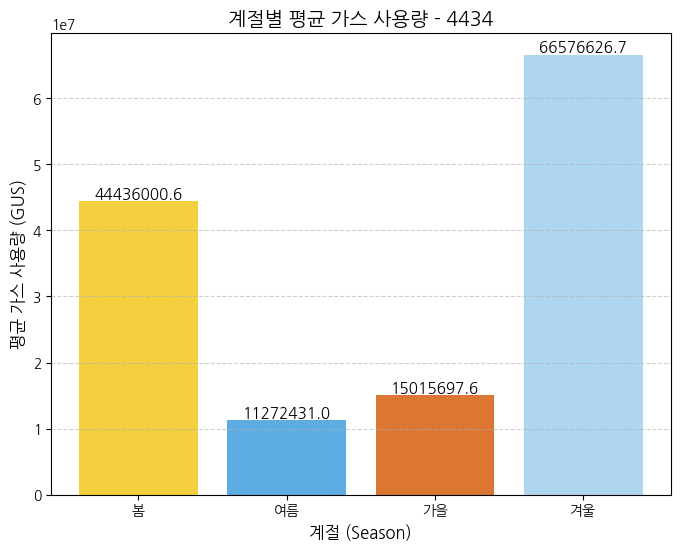

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 파일 불러오기
df = pd.read_csv("eco_energy_data.csv", encoding="utf-8-sig")

# 계절 컬럼 추가
def get_season(month):
    if month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    elif month in [9, 10, 11]:
        return "가을"
    else:
        return "겨울"

df["season"] = df["MON"].apply(get_season)

# 계절별 가스 사용량 평균 계산
season_avg = df.groupby("season")["GUS"].mean().reset_index()

# 계절 순서 맞추기
season_order = ["봄", "여름", "가을", "겨울"]
season_avg = season_avg.set_index("season").loc[season_order].reset_index()

# 그래프 그리기
plt.figure(figsize=(8,6))
bars = plt.bar(season_avg["season"], season_avg["GUS"], color=["#F4D03F", "#5DADE2", "#DC7633", "#AED6F1"])

# 각 막대 위에 평균값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.1f}", ha="center", va="bottom", fontsize=11)

# 제목, 축 이름, 격자 설정
plt.title("계절별 평균 가스 사용량 - 4434", fontsize=14)
plt.xlabel("계절 (Season)", fontsize=12)
plt.ylabel("평균 가스 사용량 (GUS)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 그래프 저장 및 출력
plt.savefig("seasonal_gas_usage_4434.png", dpi=300)
plt.show()